In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import math 
import idx2numpy
import pandas as pd
import random
%matplotlib inline

In [3]:
# load the data 
train_x = idx2numpy.convert_from_file('./data/train-images-idx3-ubyte').astype(float)
train_y = idx2numpy.convert_from_file('./data/train-labels-idx1-ubyte').astype(float)
test_x = idx2numpy.convert_from_file('./data/t10k-images-idx3-ubyte').astype(float)
test_y = idx2numpy.convert_from_file('./data/t10k-labels-idx1-ubyte').astype(float)

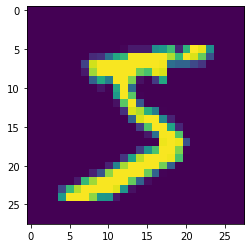

In [4]:
plt.imshow(train_x[0,:])
plt.show()

In [4]:
def createmvn(kernel_matrix): 
    mu, cov = np.zeros(tf.shape(kernel).numpy()[0]), kernel #tf.linalg.inv(kernel)

In [5]:
# Section 1 Question 2
# Sampling from a centered kernel. 

def create_kernel_matrix(kernelfunc, data):  
    return myarray(data.shape[0], lambda i, j: kernelfunc(data[int(i)] , data[int(j)])) 



def sampleRKHS(kernelfunc, data, ssize=12, center=True, rkhs_range=(-4,4), func_precision=100, diag_add=1e-6):
    """
    kernelfunc - lambda func that defines the kernel matrix of size dsize x dsize
    dsize - number of elements in the original dataset. 
    ssize - sample size, how many functions from RKHS to sample
    rkhs_range - what range to display the RKHS functions on
    func_precision - how many points to genereate in the rkhs_range (to draw lines) i.e resolution of lines

    returns X, Y -> X: domain values with shape(func_precision, ssize) Y: y values sampled RKHS functions 
    shape(func_precision, ssize) each col represents x and y values of each sampled function. 
    """
    K = create_kernel_matrix(kernelfunc, data) 
    if center:  
        IU = np.identity(data.shape[0]) - np.full((data.shape[0], data.shape[0]), 1 / data.shape[0])
        K = np.matmul(IU, np.matmul(K, IU))
    K += np.identity(data.shape[0]) * diag_add


    mvn = create_normal_distribution(K) 
    xi = np.linspace(rkhs_range[0], rkhs_range[1], func_precision) # this will be the domain we will be looking at of the RKHS space. 

    # create a matrix that will store the domains of the sampled value (linespace).
    # each column will be the same since we are analyzing them in the same domain.  
    y = np.reshape(xi.T, (xi.shape[0], 1)) # create a transpose of x (since each col will represent the points we are eval at)
    X_f = y
    X_k = y
    for i in range (0, ssize - 1): # range == # of datums in original dataset. 
        X_f = np.concatenate((X_f, y), axis=1)
    
    for i in range(0, data.shape[0] - 1): 
        X_k = np.concatenate((X_k, y), axis=1)

    
    # create functions evaluated at the 10 different basis functions 
    # each basis function is a kernel evaluated at each point holding second variable constant. 
    # in this case we are evaluating the second variable at (almost) all possible points (large number of rows representing domain)
    Kx = np.zeros((X_k.shape[0], data.shape[0]))


    for i in range(Kx.shape[0]): 
        for j in range(Kx.shape[1]):
            Kx[i, j] = kernelfunc(data[j], X_k[i, j])
    
    

    # now create the weighted functions now representing the actual functions in RKHS. 
    alphas = mvn.sample([ssize]).numpy() # sample the alpha weights by which each kernel function will be weighed. 
    # each fx will need its own alpha. Amount sampled is the amount of sample functions we want to generate. 
    Fx = np.matmul(Kx, alphas.T)
    return X_f, Fx, alphas,K


In [6]:
def create_normal_distribution(kernel): 
    # mu, cov = np.zeros(tf.shape(kernel).numpy()[0]), tf.linalg.inv(kernel)
    # scale = np.linalg.cholesky(cov)
    mu, cov = np.zeros(tf.shape(kernel).numpy()[0]), kernel
    scale = np.linalg.cholesky(cov)
    return tfp.distributions.MultivariateNormalTriL(loc=mu,scale_tril=scale)

In [7]:
t=10
gk = lambda i, j: np.exp( (-1.0 /  ( 2.0 * t**2 )) * (i - j)**2 )
data = np.array([i for i in range(-10, 1)])
x,y,a,k = sampleRKHS(gk, data, rkhs_range=(-10,0))
print(a.shape)
# plt.title(r'$\tau = 0.5$')
# for i in range(0, 10): 
#     plt.plot(a[:, i])
for i in range(0, 10): 
    plt.plot(a[i, :])


#plt.savefig("./latex/figures/t10.pdf")

NameError: name 'myarray' is not defined

In [0]:
# check that the average of RKHS is approximately 0. 
n = np.full((12,1),fill_value=1/12)
np.matmul(a.T, n)

In [0]:
i = 1
plt.imshow(train_x[1,:])
plt.imshow(train_x[i,:])
plt.show()
np.matmul(np.reshape(train_x[1], 28**2).T, np.reshape(train_x[i], 28**2))

In [5]:
# reshape all of the data. 
train_x_r = train_x.reshape((60000, 784))
train_x_r.shape

(60000, 784)

In [6]:
def create_kernel_matrix(kernelfunc, data):  
    return myarray(kernelfunc, data) 

def myarray(func, data):
    size = data.shape[0] 
    matrix = np.zeros((size, size))
    for i in range(0, size): 
        for j in range(0, size): 
            matrix[i, j] = func(data[i], data[j])
    return matrix

In [8]:
# linear = lambda x, y: np.matmul(x.T, y)
# kernel = create_kernel_matrix(linear, train_x_r)
kernel = tf.matmul(train_x_r, train_x_r.T)

NameError: name 'train_x_r' is not defined

In [10]:
kernel.shape

NameError: name 'kernel' is not defined

In [11]:
train_x_r.shape

(60000, 784)

In [7]:
# sample a smaller size. 
sample = random.sample(range(0, 60000), 500)
x = train_x_r[sample, :]
y = train_y[sample]

In [134]:
kernel = tf.matmul(x, x.T)


In [135]:
# center the kernel. 
IU = np.identity(kernel.shape[0]) - np.full((kernel.shape[0], kernel.shape[0]), 1 / kernel.shape[0])
kernel = tf.linalg.matmul(IU, tf.linalg.matmul(kernel, IU))
kernel += np.identity(kernel.shape[0]) * 1e-6 # to ensure positive definitness. 

e, v = tf.linalg.eigh(kernel)

In [136]:
#v.shape # eigen vectors
kernel[1,:]

<tf.Tensor: shape=(500,), dtype=float64, numpy=
array([-1.66874499e+03,  4.37847810e+06,  4.81859967e+05,  1.22380811e+05,
        7.57953630e+04,  5.16536495e+05, -5.32871513e+05,  4.83095050e+04,
        3.07332137e+05,  1.38877101e+03,  1.40038263e+06, -5.34386591e+05,
       -9.80166603e+05, -5.52210989e+05,  4.84839213e+05, -3.04044570e+04,
       -2.67797383e+05, -2.55194307e+05, -5.43454623e+05,  1.93015332e+06,
       -7.94547850e+04, -1.83757739e+05, -4.54538699e+05, -7.82464735e+05,
        1.83252628e+06, -6.29127049e+05,  6.45677461e+05,  2.34534629e+05,
        1.10048373e+05,  5.13827210e+04, -1.91037963e+05, -3.08921653e+05,
        1.66053615e+05,  1.30906935e+05, -8.73032105e+05,  1.45607351e+05,
       -2.34860570e+04,  3.67868610e+04, -5.34903525e+05, -1.21427771e+05,
        3.06548130e+04, -3.41243499e+03,  2.78595527e+05,  1.65141499e+06,
       -1.85004593e+05, -4.54694145e+05, -2.92986483e+05, -1.01176499e+03,
       -8.22777371e+05,  2.95280199e+05, -6.45321737

In [137]:
e.shape
pd.DataFrame(e).head() # looks like the eigenvalues are already sorted. 

,0
0,0.000001
1,34.951238
2,56.955905
3,85.047457
4,104.153982


In [14]:
ones = []
sevens = []
for i in range(0, y.shape[0]):
     if y[i] == 1: 
         ones.append(i)
     elif y[i] == 7: 
         sevens.append(i)

In [139]:
ones = np.array(ones)
sevens = np.array(sevens)

In [140]:
def v1(p, i, j):
    v.numpy()[i, p] * np.matmul(v.numpy()[:, p], kernel.numpy()[sevens[i], :])

In [141]:
# project first 8 ones and sevens unto the first principle minor. 
ones_1p = []
sevens_1p = []
for i in range(0, 30): 
    ones_1p.append(v.numpy()[ones[i], 0] * np.matmul(v.numpy()[:, 0], kernel.numpy()[ones[i], :]))
    sevens_1p.append(v.numpy()[sevens[i], 0] * np.matmul(v.numpy()[:, 0], kernel.numpy()[sevens[i], :]))

In [142]:
#project first 8 ones and sevens unto the first principle minor. 
ones_2p = []
sevens_2p = []
for i in range(0, 30): 
    ones_2p.append(v.numpy()[ones[i], 1] * np.matmul(v.numpy()[:, 1], kernel.numpy()[ones[i], :]))
    sevens_2p.append(v.numpy()[sevens[i], 1] * np.matmul(v.numpy()[:, 1], kernel.numpy()[sevens[i], :]))

# ones_1p = []
# sevens_1p = []
# for i in range(0, 30): 
#     ones_1p.append(np.matmul(v.numpy()[:, 0], kernel.numpy()[ones[i], :]))
#     sevens_1p.append(np.matmul(v.numpy()[:, 0], kernel.numpy()[sevens[i], :]))

# ones_2p = []
# sevens_2p = []
# for i in range(0, 30): 
#     ones_2p.append(np.matmul(v.numpy()[:, 1], kernel.numpy()[ones[i], :]))
#     sevens_2p.append(np.matmul(v.numpy()[:, 1], kernel.numpy()[sevens[i], :]))

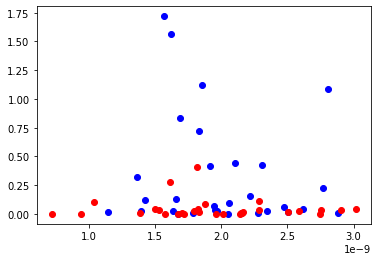

In [143]:
plt.plot(ones_1p, ones_2p, 'o', color='blue')
plt.plot(sevens_1p, sevens_2p, 'o', color='red')

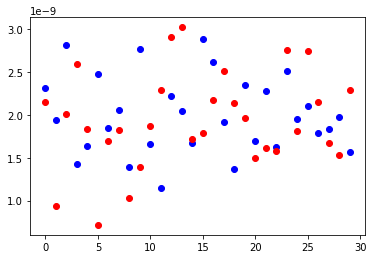

In [144]:
plt.plot(ones_1p, 'o', color='blue')
plt.plot(sevens_1p, 'o', color='red')

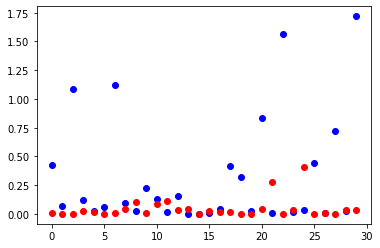

In [145]:
plt.plot(ones_2p, 'o', color='blue')
plt.plot(sevens_2p, 'o', color='red')

In [146]:
npkernel = kernel.numpy()
npv = v.numpy()

In [147]:
projected = tf.multiply(tf.linalg.matmul(v, kernel, transpose_a=True), v) 

In [148]:
projected.shape

TensorShape([500, 500])

In [149]:
np_proj = projected.numpy()

In [150]:
ones_proj = []
sevens_proj = [] 
for i in ones: 
    ones_proj.append(projected[i, 0:8])
for i in sevens: 
    sevens_proj.append(projected[i, 0:8])
ones_proj = np.array(ones_proj)
sevens_proj = np.array(sevens_proj)
(ones_proj.shape, sevens_proj.shape)

((50, 8), (61, 8))

In [21]:
def create_kernel_matrix(kernelfunc, data):  
    return myarray(kernelfunc, data) 

def myarray(func, data):
    size = data.shape[0] 
    matrix = np.zeros((size, size))
    for i in range(0, size): 
        for j in range(0, size): 
            matrix[i, j] = func(data[i], data[j])
    return matrix

In [22]:
t = 0.15
gausskernel = lambda i, j: np.exp( (-1.0 /  ( 2.0 * t**2 )) * np.linalg.norm(i - j)**2 )

In [23]:
gkernel = create_kernel_matrix(gausskernel, x)
# center the kernel. 
IU = np.identity(gkernel.shape[0]) - np.full((gkernel.shape[0], gkernel.shape[0]), 1 / gkernel.shape[0])
gkernel = tf.linalg.matmul(IU, tf.linalg.matmul(gkernel, IU))
gkernel += np.identity(gkernel.shape[0]) * 1e-6 # to ensure positive definitness. 

ge, gv = tf.linalg.eigh(gkernel)

In [24]:
#gprojected = tf.multiply(tf.linalg.matmul(gv, gkernel, transpose_a=True), gv) 
gse = np.sqrt(ge)
gprojected = []
for i in range(0, gv.shape[0]):
    gprojected.append(gv[:, i] * gse)
gprojected = np.array(gprojected)
gprojected.shape


(500, 500)

In [25]:
gones_proj = []
gsevens_proj = [] 
for i in ones: 
    gones_proj.append(gprojected[i, 0:8])
for i in sevens: 
    gsevens_proj.append(gprojected[i, 0:8])
gones_proj = np.array(gones_proj)
gsevens_proj = np.array(gsevens_proj)
(gones_proj.shape, gsevens_proj.shape)

((55, 8), (58, 8))

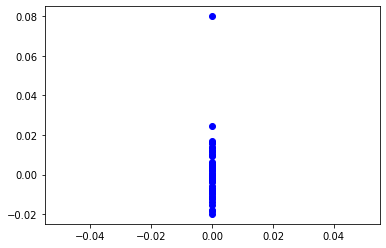

In [26]:
plt.plot(gones_proj[0:48, 0], gones_proj[0:48, 1], 'o', color='blue')
#plt.plot(gsevens_proj[0:48, 0], gsevens_proj[0:48, 1], 'o', color='red')

In [192]:
# center the kernel. 
IU = np.identity(kernel.shape[0]) - np.full((kernel.shape[0], kernel.shape[0]), 1 / kernel.shape[0])
kernel = tf.linalg.matmul(IU, tf.linalg.matmul(kernel, IU))
kernel += np.identity(kernel.shape[0]) * 1e-6 # to ensure positive definitness. 
e, v = tf.linalg.eigh(kernel)

In [194]:
e.shape

TensorShape([500])

In [202]:
ones = []
sevens = []
for i in range(0, y.shape[0]):
     if y[i] == 1: 
         ones.append(i)
     elif y[i] == 7: 
         sevens.append(i)

In [208]:
se = np.sqrt(e)
projected = []
for i in range(0, v.shape[0]):
    projected.append(v[:, i] * se)
projected = np.array(projected)
projected.shape

(500, 500)

In [209]:
projected.shape
ones_proj = []
sevens_proj = [] 
for i in ones: 
    ones_proj.append(projected[i, 0:8])
for i in sevens: 
    sevens_proj.append(projected[i, 0:8])
ones_proj = np.array(ones_proj)
sevens_proj = np.array(sevens_proj)
(ones_proj.shape, sevens_proj.shape)

((50, 8), (61, 8))

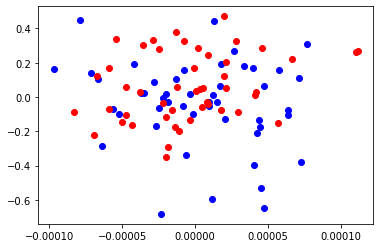

In [210]:
plt.plot(ones_proj[0:48, 0], ones_proj[0:48, 1], 'o', color='blue')
plt.plot(sevens_proj[0:48, 0], sevens_proj[0:48, 1], 'o', color='red')

In [203]:
onesp = []
sevensp = []
for i in ones: 
    components = []
    for j in range(0, 8): 
        components.append(np.sqrt(e[j]) * v[i, j])
    onesp.append(components)
for i in sevens: 
    components = []
    for j in range(0, 8): 
        components.append(np.sqrt(e[j]) * v[i, j])
    sevensp.append(components)

In [206]:
sevensp = np.array(sevensp)
onesp = np.array(onesp)
onesp.shape

(50, 8)

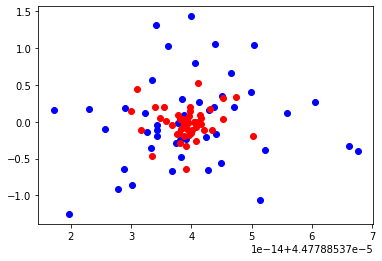

In [207]:
plt.plot(onesp[0:48, 0], onesp[0:48, 1], 'o', color='blue')
plt.plot(sevensp[0:48, 0], sevensp[0:48, 1], 'o', color='red')